{0: array([1.98726097, 0.90144281]), 1: array([-1.73102222,  7.43349916]), 2: array([-0.33514647,  3.62624134]), 3: array([-0.89247947,  8.18394342])}


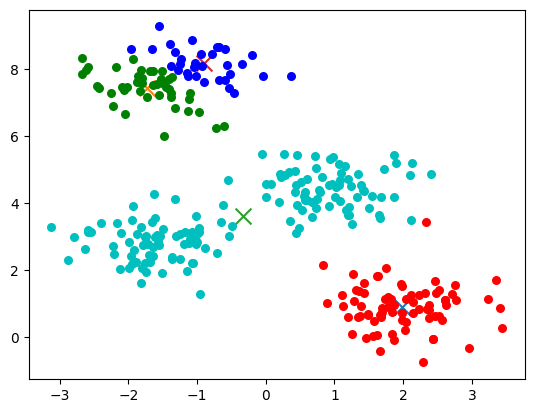

In [2]:
#In this Project I have written the complete implementation of K-Mean Clustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

class K_Means:

    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations

    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

    def fit(self, data):

        # Let the first K points from the dataset be the initial centroids
        self.centroids = {i: data[i] for i in range(self.k)}

        # Start K-Mean clustering
        for i in range(self.max_iterations):
            # Create classifications the size of K
            self.classes = {j: [] for j in range(self.k)}  # Empty them

            # Find the distance between the points and the centroids
            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[index]) for index in self.centroids]

                # Find which cluster the datapoint belongs to by finding the minimum
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            # Now that we have classified the datapoints into clusters, we need to find new centroids
            # by taking the centroid of the points in the cluster class
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.mean(self.classes[cluster_index], axis=0)


def main():

    # Generate dummy cluster datasets
    K = 4
    X, y_true = make_blobs(n_samples=300, centers=K,
                           cluster_std=0.60, random_state=0)

    k_means = K_Means(K)
    k_means.fit(X)

    print(k_means.centroids)

    # Plotting starts here
    colors = 10 * ["r", "g", "c", "b", "k"]

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s=130, marker="x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color=color, s=30)

if __name__ == "__main__":
    main()
